In [37]:
import numpy as np
from os import path
import matplotlib.pyplot as plt
from scipy.stats import entropy
from os import listdir
import pandas as pd
from sklearn.preprocessing import normalize,StandardScaler



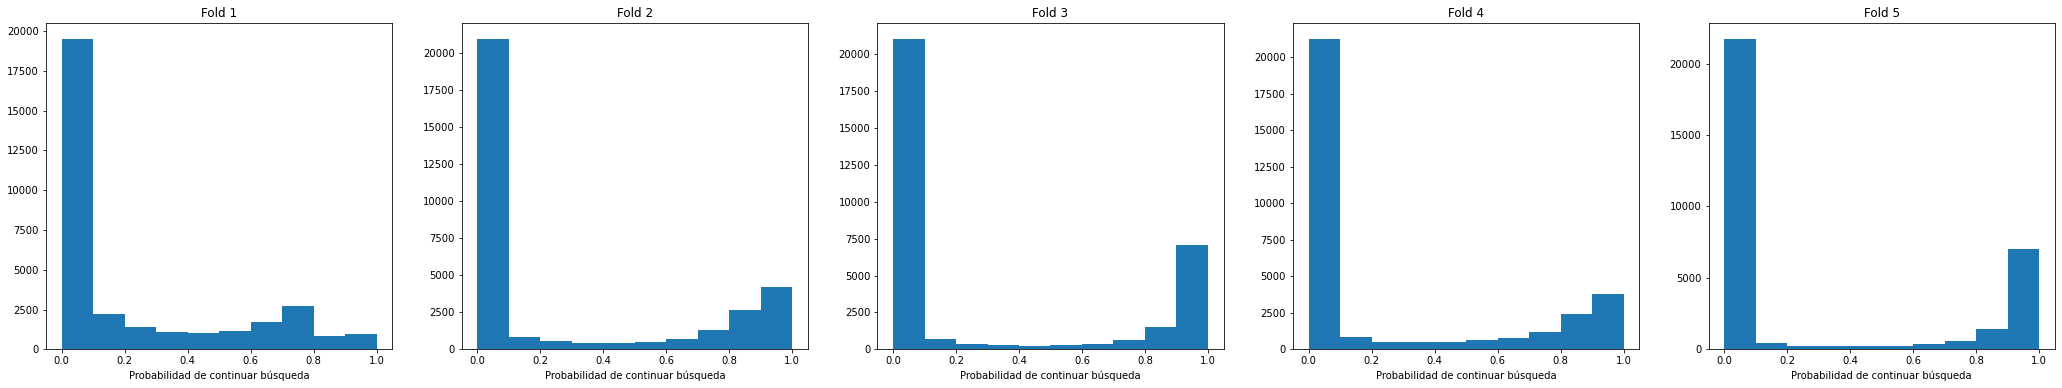

In [2]:
#distribuciones generales
fig, ax = plt.subplots(1, 5, figsize = (36,6))
for i in range(1,6):
    outputs = np.load(path.abspath(f"gng-outputs-{i}.npz"))["outputs"]
    outputs = outputs[int(outputs.shape[0]/2):]
    ax[i-1].hist(outputs)
    ax[i-1].set_title(f"Fold {i}")
    ax[i-1].set_xlabel("Probabilidad de continuar búsqueda")
    


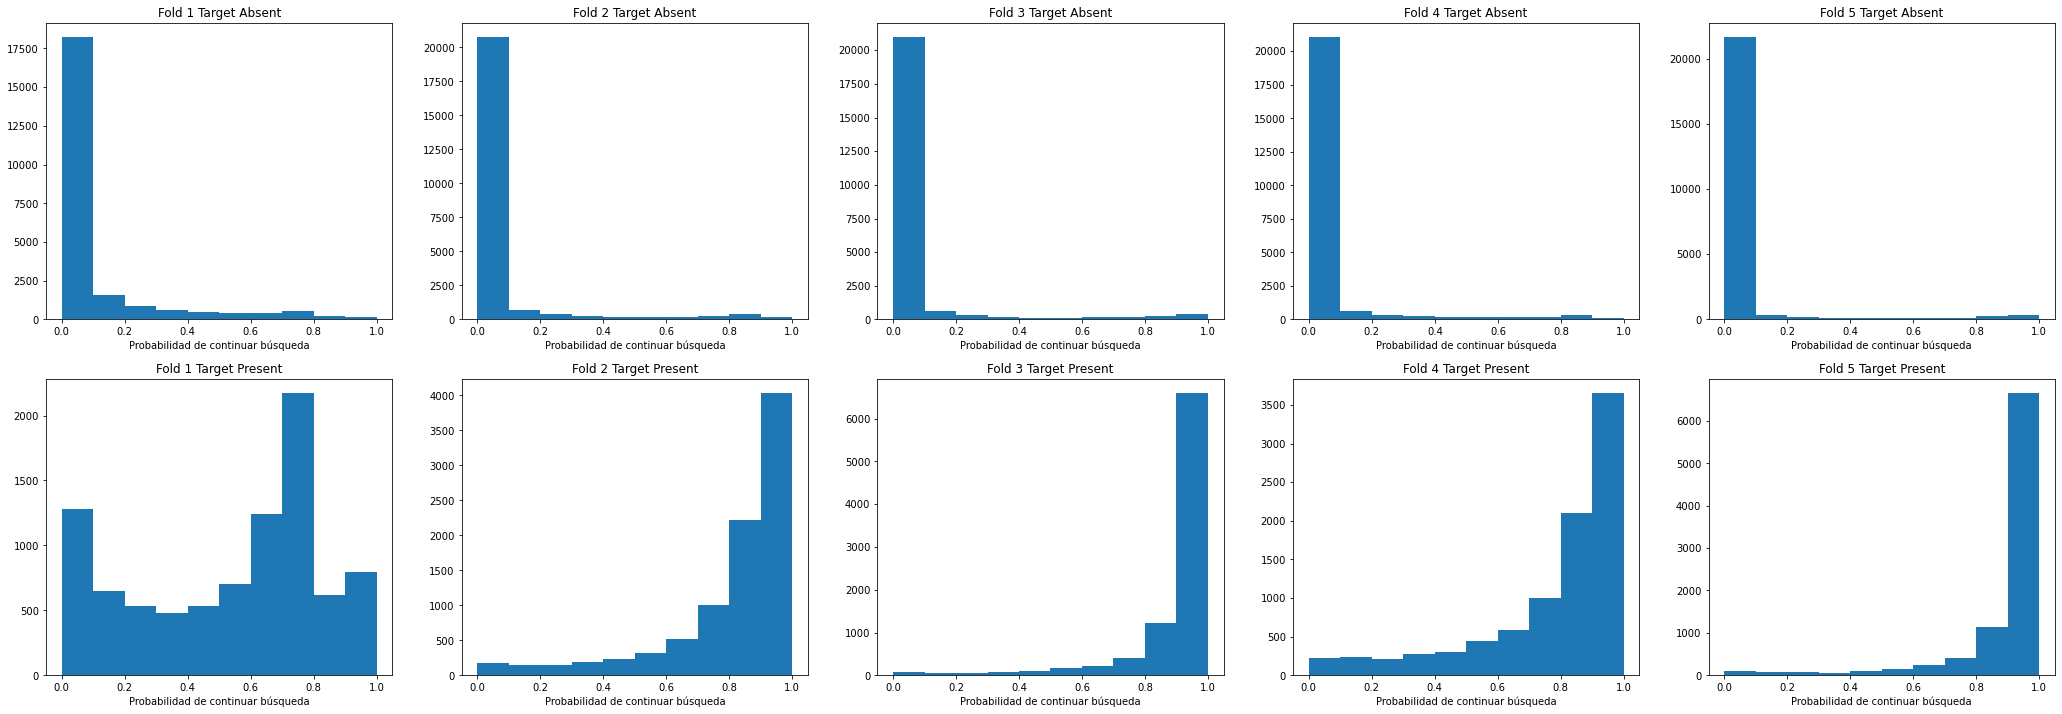

In [3]:
#distribuciones por label
fig, ax = plt.subplots(2, 5, figsize = (36,12))
for i in range(1,6):
    dict = np.load(path.abspath(f"gng-outputs-{i}.npz"))
    outputs = dict["outputs"]
    labels = dict["labels"]
    labels = labels[int(labels.shape[0]/2):]
    outputs = outputs[int(outputs.shape[0]/2):]
    tp_labels_indexes = np.where(labels == 1)[0]
    ta_labels_indexes = np.where(labels == 0)[0]
    ta_outputs = outputs[ta_labels_indexes]
    tp_outputs = outputs[tp_labels_indexes]
    ax[0][i-1].hist(ta_outputs)
    ax[0][i-1].set_title(f"Fold {i} Target Absent")
    ax[0][i-1].set_xlabel("Probabilidad de continuar búsqueda")
    ax[1][i-1].hist(tp_outputs)
    ax[1][i-1].set_title(f"Fold {i} Target Present")
    ax[1][i-1].set_xlabel("Probabilidad de continuar búsqueda")

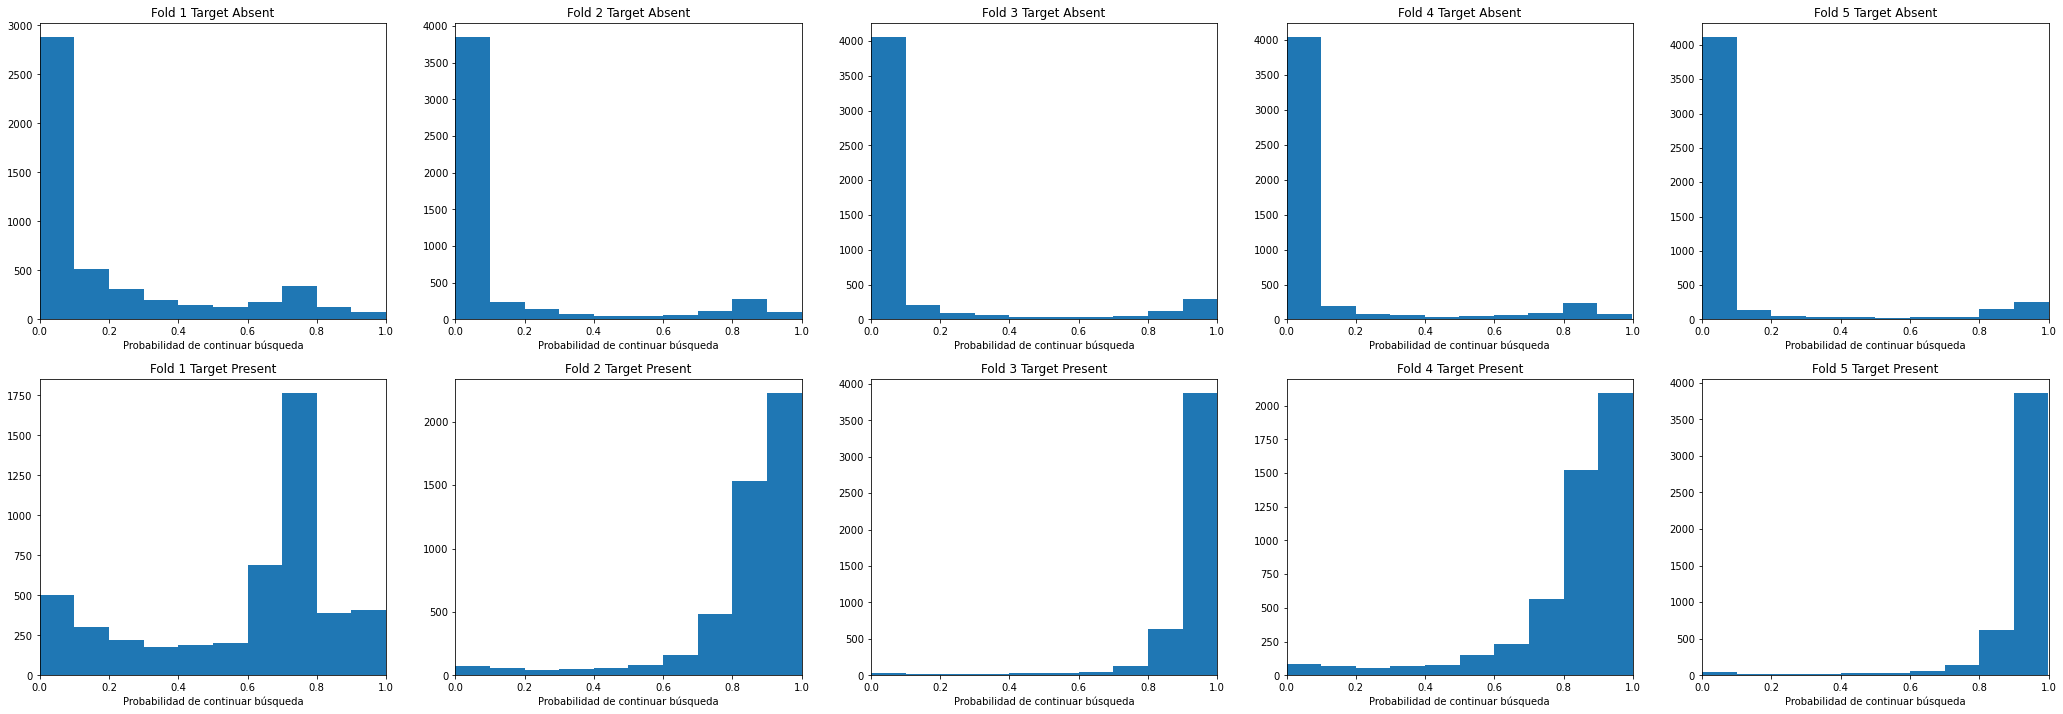

In [4]:
#distribuciones por número de fijación
fig, ax = plt.subplots(2, 5, figsize = (36,12))
for i in range(1,6):
    dict = np.load(path.abspath(f"gng-outputs-{i}.npz"))
    outputs = dict["outputs"]
    labels = dict["labels"]
    fixations = dict["fixations"]
    fixations = fixations[int(fixations.shape[0]/2):]
    labels = labels[int(labels.shape[0]/2):]
    outputs = outputs[int(outputs.shape[0]/2):]
    fixation_indexes = np.where(fixations == 1)[0]     
    tp_labels_indexes = np.where(labels == 1)[0]
    ta_labels_indexes = np.where(labels == 0)[0]
    tp_labels_indexes = np.intersect1d(tp_labels_indexes,fixation_indexes)
    ta_labels_indexes = np.intersect1d(ta_labels_indexes,fixation_indexes)    
    ta_outputs = outputs[ta_labels_indexes]
    tp_outputs = outputs[tp_labels_indexes]    
    ax[0][i-1].hist(ta_outputs)
    ax[0][i-1].set_title(f"Fold {i} Target Absent")
    ax[0][i-1].set_xlabel("Probabilidad de continuar búsqueda")
    ax[0][i-1].set_xlim(0,1)
    ax[1][i-1].hist(tp_outputs)
    ax[1][i-1].set_xlim(0,1)
    ax[1][i-1].set_title(f"Fold {i} Target Present")
    ax[1][i-1].set_xlabel("Probabilidad de continuar búsqueda")

# algunas ideas para ver la influencia del oraculo

- violinplots/histograms media de los posteriors agrupada por tp/tnp
- scatter de (media/dispersion) agrupada
- mirar algun grafico similar pero submuestreando por grupos y pintando datos que pertenezcan al mismo scanpath del mismo color
- otras ideas

In [3]:
#análisis exploratorio de posteriors
tp_data = np.load(path.abspath("./target_present_data.npz"))
tp_posteriors = tp_data["posteriors"]
tp_fixation_nums = tp_data["fixations"]
tp_labels = tp_data["labels"]
    
ta_data = np.load(path.abspath("./target_absent_data.npz"))
ta_posteriors = ta_data["posteriors"]
ta_fixation_nums = ta_data["fixations"]
ta_labels = ta_data["labels"]

tp_posteriors = tp_posteriors.reshape(tp_posteriors.shape[0],-1)
ta_posteriors = ta_posteriors.reshape(ta_posteriors.shape[0],-1)


In [63]:
#aplico filtro porque había posteriors con valores negativos, después tengo que ver por qué pasó eso en algunos scanpaths, y en CUALES pasó.

sum_values_tp = np.apply_along_axis(np.sum,1,tp_posteriors)
sum_values_ta = np.apply_along_axis(np.sum,1,ta_posteriors)

entropies_tp = np.apply_along_axis(entropy,1,tp_posteriors)
entropies_ta = np.apply_along_axis(entropy,1,ta_posteriors)

max_values_tp = np.apply_along_axis(np.amax,1,tp_posteriors)
max_values_ta = np.apply_along_axis(np.amax,1,ta_posteriors)

min_values_tp = np.apply_along_axis(np.amin,1,tp_posteriors)
min_values_ta = np.apply_along_axis(np.amin,1,ta_posteriors)

ta_medians = np.apply_along_axis(np.median,1,ta_posteriors)
tp_medians = np.apply_along_axis(np.median,1,tp_posteriors)

ta_means = np.apply_along_axis(np.mean,1,ta_posteriors)
tp_means = np.apply_along_axis(np.mean,1,tp_posteriors)


greater_zero_indexes_tp = np.where(min_values_tp > 0)[0]
greater_zero_indexes_ta = np.where(min_values_ta > 0)[0]

less_one_indexes_tp = np.intersect1d(np.where(max_values_tp < 1)[0],greater_zero_indexes_tp)
less_one_indexes_ta = np.intersect1d(np.where(max_values_ta < 1)[0],greater_zero_indexes_ta)

tp_means = tp_means[less_one_indexes_tp].reshape(-1)
ta_means = ta_means[less_one_indexes_ta].reshape(-1)
max_values_tp = max_values_tp[less_one_indexes_tp].reshape(-1)
max_values_ta = max_values_ta[less_one_indexes_ta].reshape(-1)
sum_values_tp = sum_values_tp[less_one_indexes_tp].reshape(-1)
sum_values_ta = sum_values_ta[less_one_indexes_ta].reshape(-1)
entropies_tp = entropies_tp[less_one_indexes_tp].reshape(-1)
entropies_ta = entropies_ta[less_one_indexes_ta].reshape(-1)
min_values_tp = min_values_tp[less_one_indexes_tp].reshape(-1)
min_values_ta = min_values_ta[less_one_indexes_ta].reshape(-1)
tp_medians = tp_medians[less_one_indexes_tp].reshape(-1)
ta_medians = ta_medians[less_one_indexes_ta].reshape(-1)


print("Medians")
print(np.max(ta_medians))
print(np.min(ta_medians))
print(np.max(tp_medians))
print(np.min(tp_medians))
print("Means")
print(np.max(ta_means))
print(np.min(ta_means))
print(np.max(tp_means))
print(np.min(tp_means))
print("Entropies")
print(np.max(entropies_ta))
print(np.min(entropies_ta))
print(np.max(entropies_tp))
print(np.min(entropies_tp))
print("Min values")
print(np.max(min_values_ta))
print(np.min(min_values_ta))
print(np.max(min_values_tp))
print(np.min(min_values_tp))
print("Max values")
print(np.max(max_values_ta))
print(np.min(max_values_ta))
print(np.max(max_values_tp))
print(np.min(max_values_tp))
print(np.mean(max_values_ta))
print(np.mean(max_values_tp))

#print(tp_posteriors.shape)
#print(ta_posteriors.shape)
#print(tp_means.shape)
#print(ta_means.shape)


Medians
0.0018813963547973636
4.0087477560076395e-05
0.0017788450414670518
0.00010042942983235677
Means
0.001302083333333334
0.0013020833333333328
0.001302083333333334
0.0013020833333333328
Entropies
6.636361287494122
2.4186409381838336
6.63685512776828
2.209955636263671
Min values
0.0008358192534023523
1.698178726235149e-25
0.0009947635106940676
1.2729902340568281e-12
Max values
0.3966143913517001
0.0013315387446444318
0.693373111139405
0.0013324670205003466
0.023594831266170496
0.012771638948143512
(45040, 768)
(117457, 768)
(44988,)
(116964,)


In [34]:
def parse_fixations(results_dir,label):
    posteriors = None
    fixation_numbers = np.array([],dtype=np.float32)
    i = 0
    results_dir_list = listdir(results_dir)
    results_dir_list.sort()
    for subject in results_dir_list:
        probability_maps_folder = path.join(results_dir,subject,'probability_maps')
        probability_maps_folder_list = listdir(probability_maps_folder)

        probability_maps_folder_list.sort()
        for image_id in probability_maps_folder_list:
            image_fixations_dir = path.join(probability_maps_folder,image_id)
            image_fixations_dir_list = listdir(image_fixations_dir)
            image_fixations_dir_list.sort()
            for posterior in image_fixations_dir_list:
                posterior_file = path.join(image_fixations_dir,posterior)
                fixation_numbers = np.append(fixation_numbers,float(posterior[:-4].split('_')[1]))
                data=pd.read_csv(posterior_file,delimiter=",").to_numpy()
                if posteriors is None:
                    posteriors = np.array([data])
                else:
                    posteriors = np.concatenate((posteriors,np.array([data])),axis=0)

    labels = np.full(posteriors.shape[0],label,dtype=np.int32)

    return posteriors,fixation_numbers,labels


In [35]:

ta_posteriors_bla,ta_fixations,ta_labels = parse_fixations(path.join("..","..","Results","COCOSearch18","ta_trainval_dataset","greedy_hsp","subjects_predictions"),0)
ta_posteriors_bla = ta_posteriors_bla.reshape(ta_posteriors_bla.shape[0],-1)

subject_01
000000238639
(24, 32)
